In [1]:
import zipfile
import shapely.geometry as shpg
import salem
import numpy as np
import pandas as pd
import geopandas as gpd
import glob
import matplotlib.pyplot as plt

In [2]:
files = glob.glob('velocity/*/*.tif')

In [3]:
files

['velocity/RGI-4/STDX_RGI-4.2_2021July01.tif',
 'velocity/RGI-4/V_RGI-4.1_2021July01.tif',
 'velocity/RGI-4/VX_RGI-4.2_2021July01.tif',
 'velocity/RGI-4/VY_RGI-4.2_2021July01.tif',
 'velocity/RGI-4/STDY_RGI-4.2_2021July01.tif',
 'velocity/RGI-4/VY_RGI-4.1_2021July01.tif',
 'velocity/RGI-4/STDY_RGI-4.1_2021July01.tif',
 'velocity/RGI-4/STDX_RGI-4.1_2021July01.tif',
 'velocity/RGI-4/V_RGI-4.2_2021July01.tif',
 'velocity/RGI-4/VX_RGI-4.1_2021July01.tif',
 'velocity/RGI-13-15/STDX_RGI-13-15.12_2022February09.tif',
 'velocity/RGI-13-15/VY_RGI-13-15.14_2022February09.tif',
 'velocity/RGI-13-15/STDY_RGI-13-15.7_2022February09.tif',
 'velocity/RGI-13-15/V_RGI-13-15.5_2022February10.tif',
 'velocity/RGI-13-15/VX_RGI-13-15.14_2022February09.tif',
 'velocity/RGI-13-15/VY_RGI-13-15.3_2022February09.tif',
 'velocity/RGI-13-15/VX_RGI-13-15.6_2022February09.tif',
 'velocity/RGI-13-15/STDY_RGI-13-15.12_2022February09.tif',
 'velocity/RGI-13-15/STDX_RGI-13-15.2_2022February09.tif',
 'velocity/RGI-13-15

In [4]:
gdf = gpd.GeoDataFrame()

# First round for the main file
for i, f in enumerate(files):
    if '/VX_' in f:
        rgi_reg = int(f.split('/')[1].split('-')[1])
        gdf.loc[i, 'rgi_reg'] = f'{rgi_reg:02d}'
        gdf.loc[i, 'file_id'] = f.split('VX_')[1].replace('.tif', '')
        gdf.loc[i, 'vx'] = f
        
gdf = gdf.sort_values(by=['rgi_reg', 'vx'])
gdf = gdf.reset_index(drop=True)

# Second round for all the others
for i, f in enumerate(files):
    if '/VX_' in f:
        continue
    if 'V_RGI-1.6_2021July01.tif' in f:
        # Some orphan dataset
        continue
    sel = gdf.loc[[fid in f for fid in gdf['file_id']]]
    assert len(sel) == 1
    if '/VY_' in f:
        gdf.loc[sel.index, 'vy'] = f
    if '/V_' in f:
        gdf.loc[sel.index, 'v'] = f
    if '/STDX_' in f:
        gdf.loc[sel.index, 'err_vx'] = f
    if '/STDY_' in f:
        gdf.loc[sel.index, 'err_vy'] = f
        
gdf

rgi_reg                      file_id  \
0       01       RGI-1.1_2023November22   
1       01       RGI-1.2_2023November22   
2       01       RGI-1.3_2023November22   
3       01       RGI-1.4_2023November22   
4       01       RGI-1.5_2023November22   
5       02           RGI-2.1_2021July01   
6       02           RGI-2.2_2021July01   
7       02           RGI-2.3_2021July01   
8       02           RGI-2.4_2021July01   
9       03             RGI-3_2021July01   
10      04           RGI-4.1_2021July01   
11      04           RGI-4.2_2021July01   
12      05           RGI-5.1_2021July01   
13      06             RGI-6_2021July01   
14      07           RGI-7.1_2021July01   
15      07           RGI-7.2_2021July01   
16      08           RGI-8.1_2021July01   
17      08           RGI-8.2_2021July01   
18      09           RGI-9.1_2021July01   
19      09           RGI-9.2_2021July01   
20      09           RGI-9.3_2021July01   
21      10          RGI-10.1_2021July01   
22      10          RGI-10.2_2021July01   
23      11            RGI-11_2021July01   
24      12            RGI-12_2021July01   
25      13  RGI-13-15.10_2022February09   
26      13  RGI-13-15.11_2022February09   
27      13  RGI-13-15.12_2022February09   
28      13  RGI-13-15.13_2022February09   
29      13  RGI-13-15.14_2022February09   
30      13   RGI-13-15.1_2022February09   
31      13   RGI-13-15.2_2022February09   
32      13   RGI-13-15.3_2022February09   
33      13   RGI-13-15.4_2022February09   
34      13   RGI-13-15.5_2022February10   
35      13   RGI-13-15.6_2022February09   
36      13   RGI-13-15.7_2022February09   
37      13   RGI-13-15.8_2022February09   
38      13   RGI-13-15.9_2022February09   
39      16          RGI-16.1_2021July01   
40      16          RGI-16.2_2021July01   
41      17          RGI-17.1_2021July01   
42      17          RGI-17.2_2021July01   
43      17          RGI-17.3_2021July01   
44      17          RGI-17.4_2021July01   
45      17          RGI-17.5_2021July01   
46      17          RGI-17.6_2021July01   
47      17          RGI-17.7_2021July01   
48      17          RGI-17.8_2021July01   
49      18            RGI-18_2021July01   
50      19          RGI-19.1_2021July01   
51      19          RGI-19.2_2021July01   
52      19          RGI-19.3_2021July01   
53      19          RGI-19.4_2021July01   

                                                   vx  \
0        velocity/RGI-1/VX_RGI-1.1_2023November22.tif   
1        velocity/RGI-1/VX_RGI-1.2_2023November22.tif   
2        velocity/RGI-1/VX_RGI-1.3_2023November22.tif   
3        velocity/RGI-1/VX_RGI-1.4_2023November22.tif   
4        velocity/RGI-1/VX_RGI-1.5_2023November22.tif   
5            velocity/RGI-2/VX_RGI-2.1_2021July01.tif   
6            velocity/RGI-2/VX_RGI-2.2_2021July01.tif   
7            velocity/RGI-2/VX_RGI-2.3_2021July01.tif   
8            velocity/RGI-2/VX_RGI-2.4_2021July01.tif   
9              velocity/RGI-3/VX_RGI-3_2021July01.tif   
10           velocity/RGI-4/VX_RGI-4.1_2021July01.tif   
11           velocity/RGI-4/VX_RGI-4.2_2021July01.tif   
12           velocity/RGI-5/VX_RGI-5.1_2021July01.tif   
13             velocity/RGI-6/VX_RGI-6_2021July01.tif   
14           velocity/RGI-7/VX_RGI-7.1_2021July01.tif   
15           velocity/RGI-7/VX_RGI-7.2_2021July01.tif   
16           velocity/RGI-8/VX_RGI-8.1_2021July01.tif   
17           velocity/RGI-8/VX_RGI-8.2_2021July01.tif   
18           velocity/RGI-9/VX_RGI-9.1_2021July01.tif   
19           velocity/RGI-9/VX_RGI-9.2_2021July01.tif   
20           velocity/RGI-9/VX_RGI-9.3_2021July01.tif   
21         velocity/RGI-10/VX_RGI-10.1_2021July01.tif   
22         velocity/RGI-10/VX_RGI-10.2_2021July01.tif   
23           velocity/RGI-11/VX_RGI-11_2021July01.tif   
24           velocity/RGI-12/VX_RGI-12_2021July01.tif   
25  velocity/RGI-13-15/VX_RGI-13-15.10_2022Februar...   
26  velocity/RGI-13-15/VX_RGI-13-15.11_2022Februar...   
27  velocity/RGI-13-15/VX_RGI-13-15.12_20

In [5]:
for i, s in gdf.iterrows():
    dd = salem.GeoTiff(s['v'])
    gdf.loc[i, 'geometry'] = dd.grid.extent_as_polygon(salem.wgs84)

In [12]:
gdf = gpd.GeoDataFrame(gdf[['rgi_reg', 'file_id', 'v', 'vx', 'vy', 'err_vx', 'err_vy', 'geometry']])

In [13]:
gdf.crs = salem.wgs84.crs.to_wkt()

In [8]:
import zipfile
import tarfile

def open_zip_shapefile(fpath, exclude_pattern='', include_pattern=''):
    with zipfile.ZipFile(fpath, "r") as z:
        for f in z.filelist:
            if f.filename.endswith('.shp'):
                if exclude_pattern and exclude_pattern in f.filename:
                    continue
                if include_pattern and include_pattern not in f.filename:
                    continue
                fname = f.filename
                
    return gpd.read_file('zip://' + fpath + '/' + fname)

# This could be made lazy to speed up imports
data_dir = '/home/www/fmaussion/misc/rgi7_data'

maps = {}
fpath = f'{data_dir}/l0_support_data/ne_10m_coastline.zip'
maps['coast_hr'] = open_zip_shapefile(fpath)
fpath = f'{data_dir}/l0_support_data/ne_50m_coastline.zip'
maps['coast_mr'] = open_zip_shapefile(fpath)
fpath = f'{data_dir}/l0_support_data/ne_110m_coastline.zip'
maps['coast_lr'] = open_zip_shapefile(fpath)
fpath = f'{data_dir}/l0_support_data/ne_10m_admin_0_countries.zip'
maps['countries_hr'] = open_zip_shapefile(fpath)
fpath = f'{data_dir}/l0_support_data/ne_50m_admin_0_countries.zip'
maps['countries_mr'] = open_zip_shapefile(fpath)
fpath = f'{data_dir}/l0_support_data/ne_110m_admin_0_countries.zip'
maps['countries_lr'] = open_zip_shapefile(fpath)

In [14]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

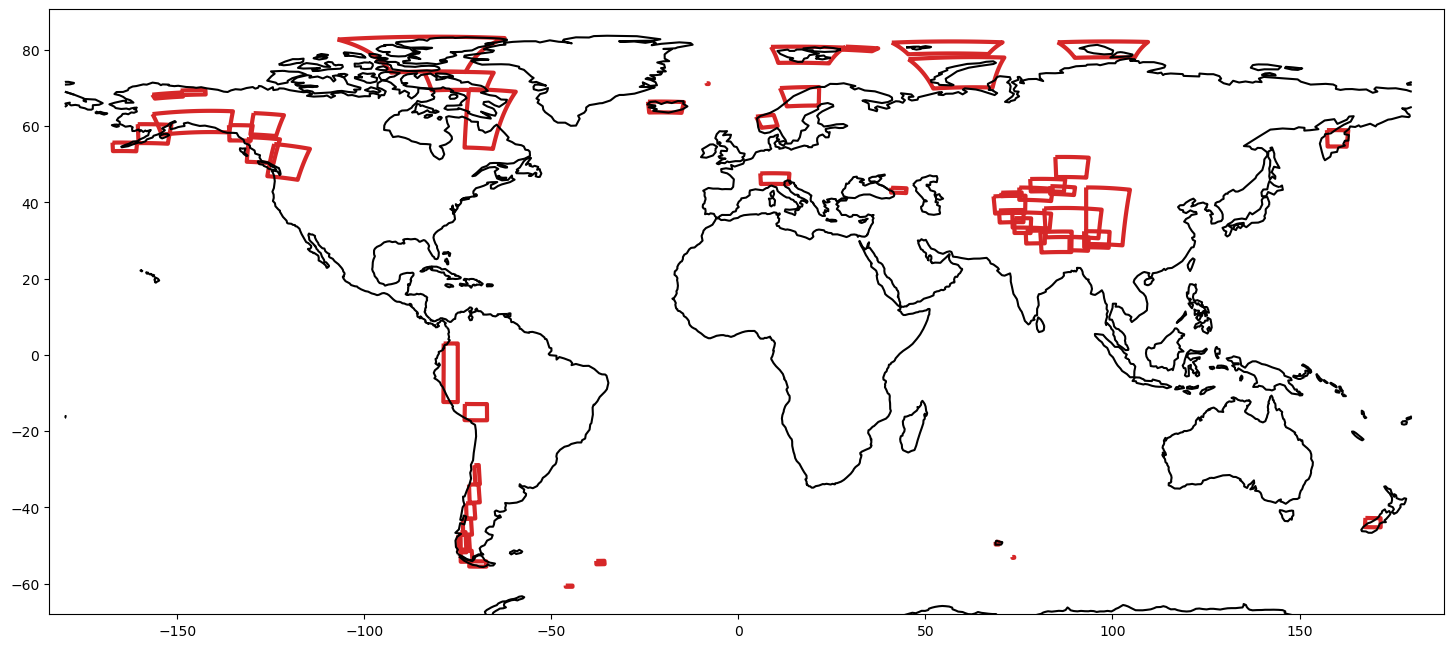

In [15]:
f, ax = plt.subplots(figsize=(18, 8))

gdf.plot(ax=ax, facecolor='none', edgecolor='C3', linewidth=3);
    
ax.autoscale(enable=False, axis='both', tight=True)
maps[f'coast_lr'].plot(ax=ax, facecolor='none', edgecolor='k', aspect=None);

# Alternative solution for "Polygon handles not passing to legend"
# ax.legend(handles=handles, loc=loc);
# if title is None:
#     title = f'RGI{reg:02d}'
# ax.set_title(title)

# if aspect is not None:
#     ax.set_aspect(aspect)

# if savefig:
#     plot_dir = data_dir + f'/l3_rgi7a_plots/RGI{reg:02d}'
#     mkdir(plot_dir)
#     plotname = 'isrgi6_map' if is_rgi6 else 'inventory_map'
#     plt.savefig(plot_dir + f'/{plotname}.png', bbox_inches='tight', dpi=150)

In [16]:
out_dir = 'millan22_velocity_lookup_shp_20231127'
gdf.to_file(out_dir)
import shutil
shutil.make_archive(f'{out_dir}', 'zip', out_dir)
shutil.rmtree(out_dir)

## Check grids:

In [17]:
for i, s in gdf.iterrows():
    g1 = salem.GeoTiff(s['v']).grid
    g2 = salem.GeoTiff(s['vy']).grid
    
    if g1.nx != g2.nx or g1.ny != g2.ny:
        print(s.file_id + ' has a different grid size for v and vx/vy')
        continue
    
    if g1.x0 != g2.x0 or g1.y0 != g2.y0:
        print(s.file_id + ' has different coordinates for v and vx/vy')
        continue
    
    if g1.dx != g2.dx or g1.dy != g2.dy:
        print(s.file_id + ' has different grid resolution for v and vx/vy')
        continue

In [18]:
for i, s in gdf.iterrows():
    g1 = salem.GeoTiff(s['vx']).grid
    g2 = salem.GeoTiff(s['vy']).grid
    
    if g1.nx != g2.nx or g1.ny != g2.ny:
        print(s.file_id + ' has a different grid size for v and vx/vy')
        continue
    
    if g1.x0 != g2.x0 or g1.y0 != g2.y0:
        print(s.file_id + ' has different coordinates for v and vx/vy')
        continue
    
    if g1.dx != g2.dx or g1.dy != g2.dy:
        print(s.file_id + ' has different grid resolution for v and vx/vy')
        continue